<a href="https://colab.research.google.com/github/TameemAlghazaly/Data-Science-Projects/blob/main/Car%20Prices%20Linear%20Regression/Car%20Prices%20Prediction%20Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Estimation Using Linear Regression

### This project aims to estimate the prices of used cars based on various features such as brand, model, age, mileage, and condition. In addition to building a regression model, the analysis explores how each feature influences the final selling price, providing valuable insights into key pricing factors.


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries & Dataset

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline
plt.style.use("seaborn-v0_8")


try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/TameemAlghazaly/Data-Science-Projects/main/Car%20Prices%20Linear%20Regression/car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Cleaning the dataset




In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [145]:
df["odometer"] = df["odometer"].str.extract('(\d+)',expand=False).astype(int)
df["sellingprice"] = df["sellingprice"].str.extract('(\d+)',expand=False).astype(int)
df["mmr"] = df["mmr"].str.extract('(\d+)',expand=False).astype(int)
df['saledate'] = pd.to_datetime(df['saledate'],utc = True,format="mixed")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00


In [146]:
for col in df.select_dtypes(include='object').columns:
  print(f"Unique values in column '{col}':")
  print(df[col].unique())
  print("-" * 30)

Unique values in column 'make':
['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']
------------------------------
Unique values in column 'model':
['Sonata' '4Runner' 'IS 250' 'X5' 'E-Series Van' 'Optima' 'Avalanche'
 'CTS' 'E-Class' 'Forte' 'Wrangler' 'G Sedan' 'MKS' 'Soul' 'Ranger'
 'Mazda6' 'Tundra' 'PT Cruiser' 'Acadia' 'Mustang' 'Odyssey' 'X3' 'STS'
 'F-150' 'Sienna' 'Liberty' 'DTS' 'Sebring' 'Nitro' 'Tacoma' 'Elantra'
 'Q7' 'Maxima' 'Corvette' 'Grand Cherokee' 'FJ Cruiser' 'Fiesta' 'Genesis'
 'Town and Country' 'F-350 Super Duty' 'Z4' 'Murano' 'Enclave' 'Altima'
 'Sentra' 'R-Class' 'Sie

In [147]:
for col in df.select_dtypes(include='object'):
  unique_count = df[col].nunique()
  total_count = len(df)
  percentage_unique = (unique_count / total_count) * 100
  print(f" '{col}' has: {percentage_unique:.2f}% unique values")

 'make' has: 0.10% unique values
 'model' has: 1.39% unique values
 'trim' has: 2.36% unique values
 'body' has: 0.15% unique values
 'transmission' has: 0.00% unique values
 'vin' has: 100.00% unique values
 'state' has: 0.07% unique values
 'color' has: 0.04% unique values
 'interior' has: 0.04% unique values
 'seller' has: 10.06% unique values


In [148]:
df=df.replace("—",np.nan)
df.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


In [149]:
df.isnull().sum()/len(df)*100

,0
year,0.000000
make,0.000000
model,0.000000
trim,0.000000
body,0.000000
transmission,0.000000
vin,0.000000
state,0.000000
condition,0.000000
odometer,0.000000


#### Filling the missing values with the most popular value

In [150]:
df['color'] = df['color'].fillna(df['color'].mode()[0])

In [151]:
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])

#### Reducing the number of body types to a few main types

In [152]:
df["body"].unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

In [153]:
df["body"]= df["body"].str.lower()

In [154]:
body=["sedan","coupe", "convertible", "hatchback", "suv", "wagon","koup","van","cab","crew"]
keyword = '|'.join(r"{}".format(x) for x in body)

df['body'] = df['body'].str.extract('('+ keyword + ')', expand=False)

In [155]:
df["body"].unique()

array(['sedan', 'suv', 'van', 'crew', 'wagon', 'cab', 'coupe',
       'convertible', 'hatchback', 'koup'], dtype=object)

In [156]:
df["body"]= df["body"].replace("crew","cab")
df["body"].unique()

array(['sedan', 'suv', 'van', 'cab', 'wagon', 'coupe', 'convertible',
       'hatchback', 'koup'], dtype=object)

In [157]:
df["body"]= df["body"].replace("koup","coupe")
df["body"].unique()

array(['sedan', 'suv', 'van', 'cab', 'wagon', 'coupe', 'convertible',
       'hatchback'], dtype=object)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          46578 non-null  int64              
 1   make          46578 non-null  object             
 2   model         46578 non-null  object             
 3   trim          46578 non-null  object             
 4   body          46578 non-null  object             
 5   transmission  46578 non-null  object             
 6   vin           46578 non-null  object             
 7   state         46578 non-null  object             
 8   condition     46578 non-null  float64            
 9   odometer      46578 non-null  int64              
 10  color         46578 non-null  object             
 11  interior      46578 non-null  object             
 12  seller        46578 non-null  object             
 13  mmr           46578 non-null  int64              
 14  sellin

In [159]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000
mean,2010.203401,3.424265,66850.642621,13810.580102,13669.705204
std,3.831316,0.944009,51868.395670,9510.332473,9632.257208
min,1990.000000,1.000000,1.000000,25.000000,150.000000
25%,2008.000000,2.700000,28185.000000,7400.000000,7100.000000
50%,2012.000000,3.600000,51193.000000,12300.000000,12200.000000
75%,2013.000000,4.200000,97146.500000,18250.000000,18200.000000
max,2015.000000,5.000000,999999.000000,146000.000000,230000.000000


## Exploring the Dataset


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          46578 non-null  int64              
 1   make          46578 non-null  object             
 2   model         46578 non-null  object             
 3   trim          46578 non-null  object             
 4   body          46578 non-null  object             
 5   transmission  46578 non-null  object             
 6   vin           46578 non-null  object             
 7   state         46578 non-null  object             
 8   condition     46578 non-null  float64            
 9   odometer      46578 non-null  int64              
 10  color         46578 non-null  object             
 11  interior      46578 non-null  object             
 12  seller        46578 non-null  object             
 13  mmr           46578 non-null  int64              
 14  sellin

In [161]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000
mean,2010.203401,3.424265,66850.642621,13810.580102,13669.705204
std,3.831316,0.944009,51868.395670,9510.332473,9632.257208
min,1990.000000,1.000000,1.000000,25.000000,150.000000
25%,2008.000000,2.700000,28185.000000,7400.000000,7100.000000
50%,2012.000000,3.600000,51193.000000,12300.000000,12200.000000
75%,2013.000000,4.200000,97146.500000,18250.000000,18200.000000
max,2015.000000,5.000000,999999.000000,146000.000000,230000.000000


Text(191.09722222222223, 0.5, 'Selling Count')

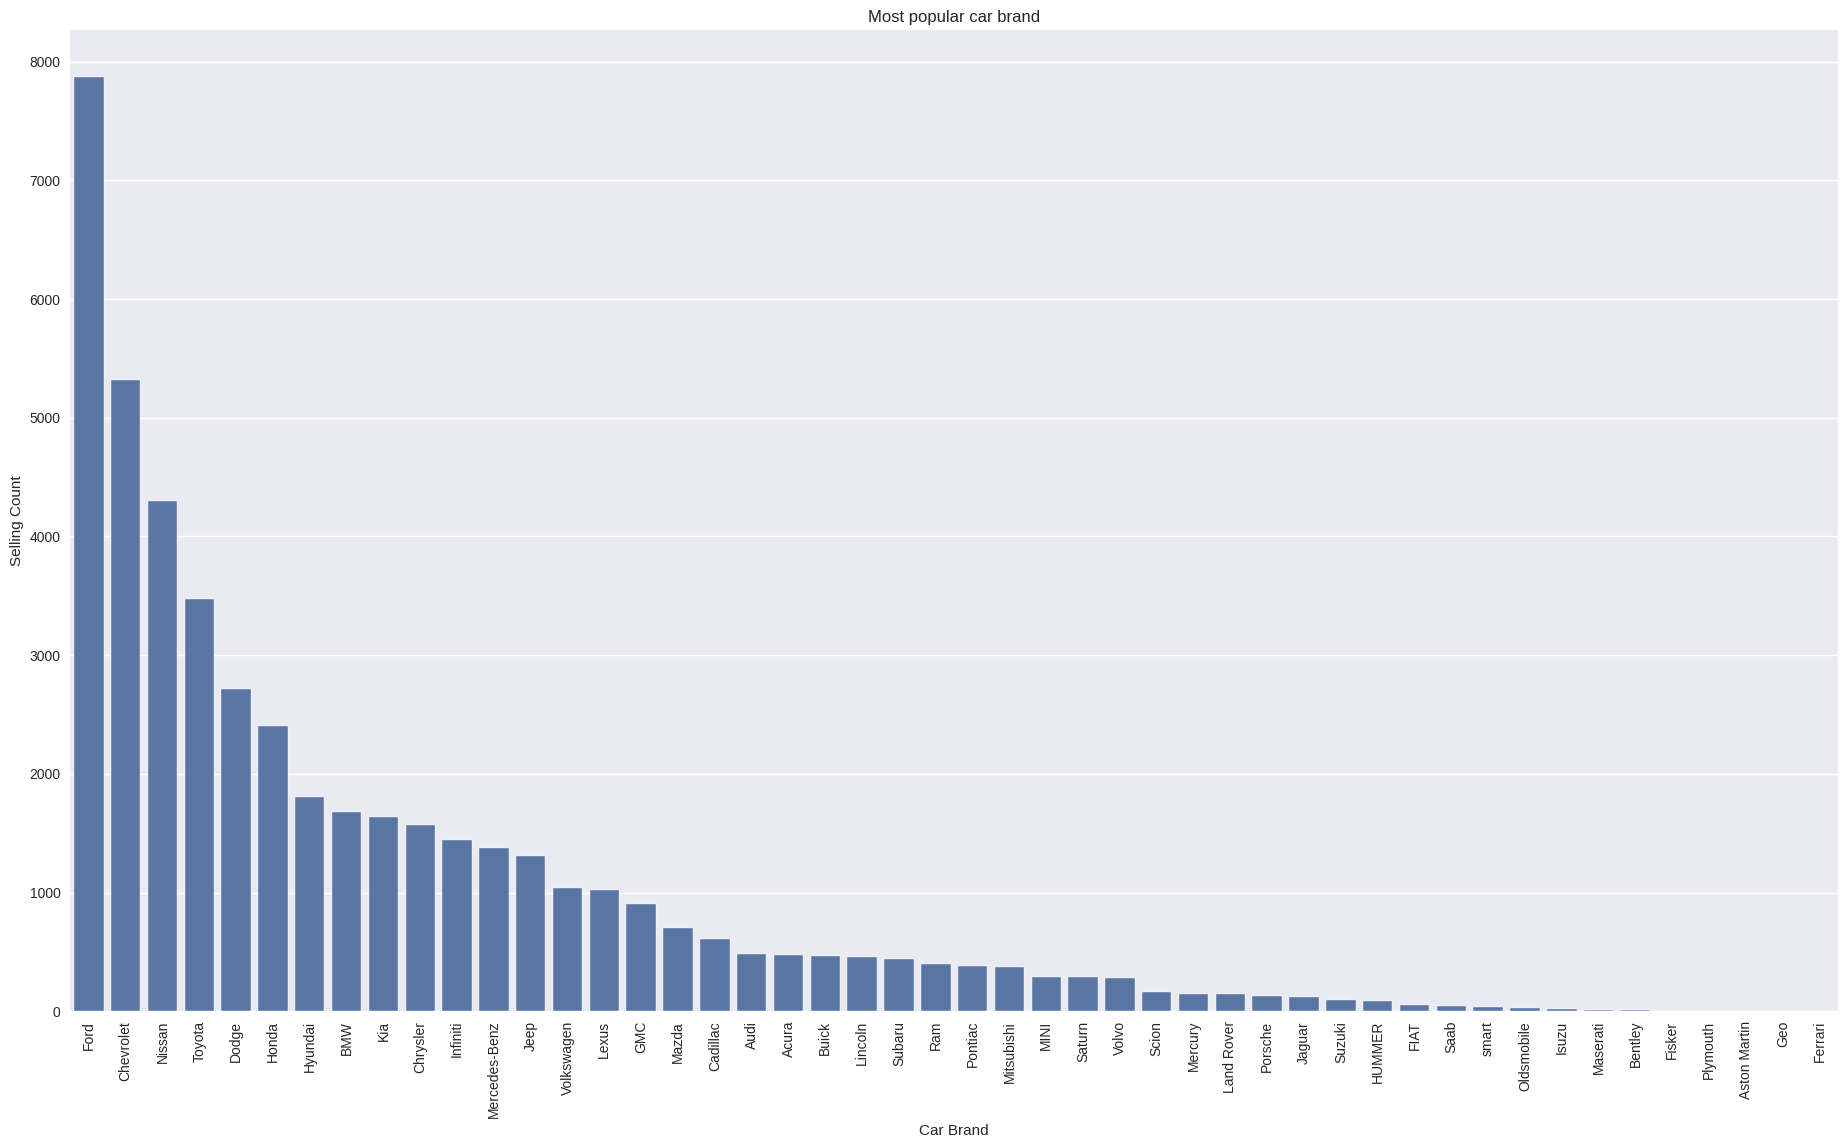

In [162]:
f = plt.figure(figsize=(19,12))
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brand')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Car Brand')
plt.ylabel('Selling Count')

**We can see that Ford and Chevrolet are the most common sold types.**

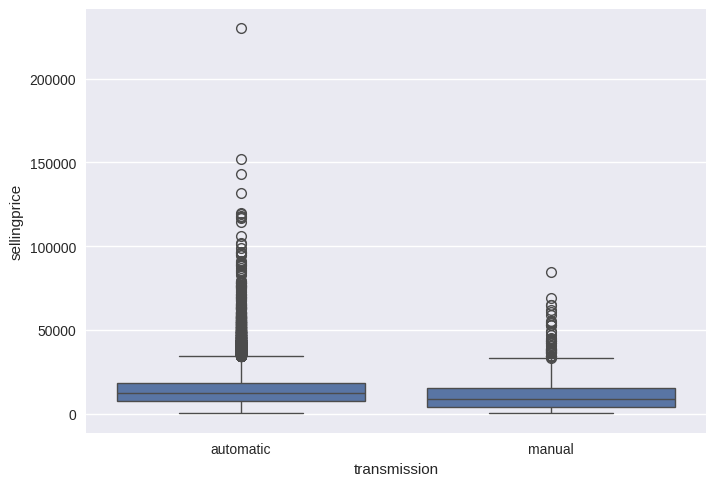

In [163]:
ax= sns.boxplot(x="transmission",y="sellingprice",data=df)

**Automatic cars on average have slightly higher prices than manual cars.**

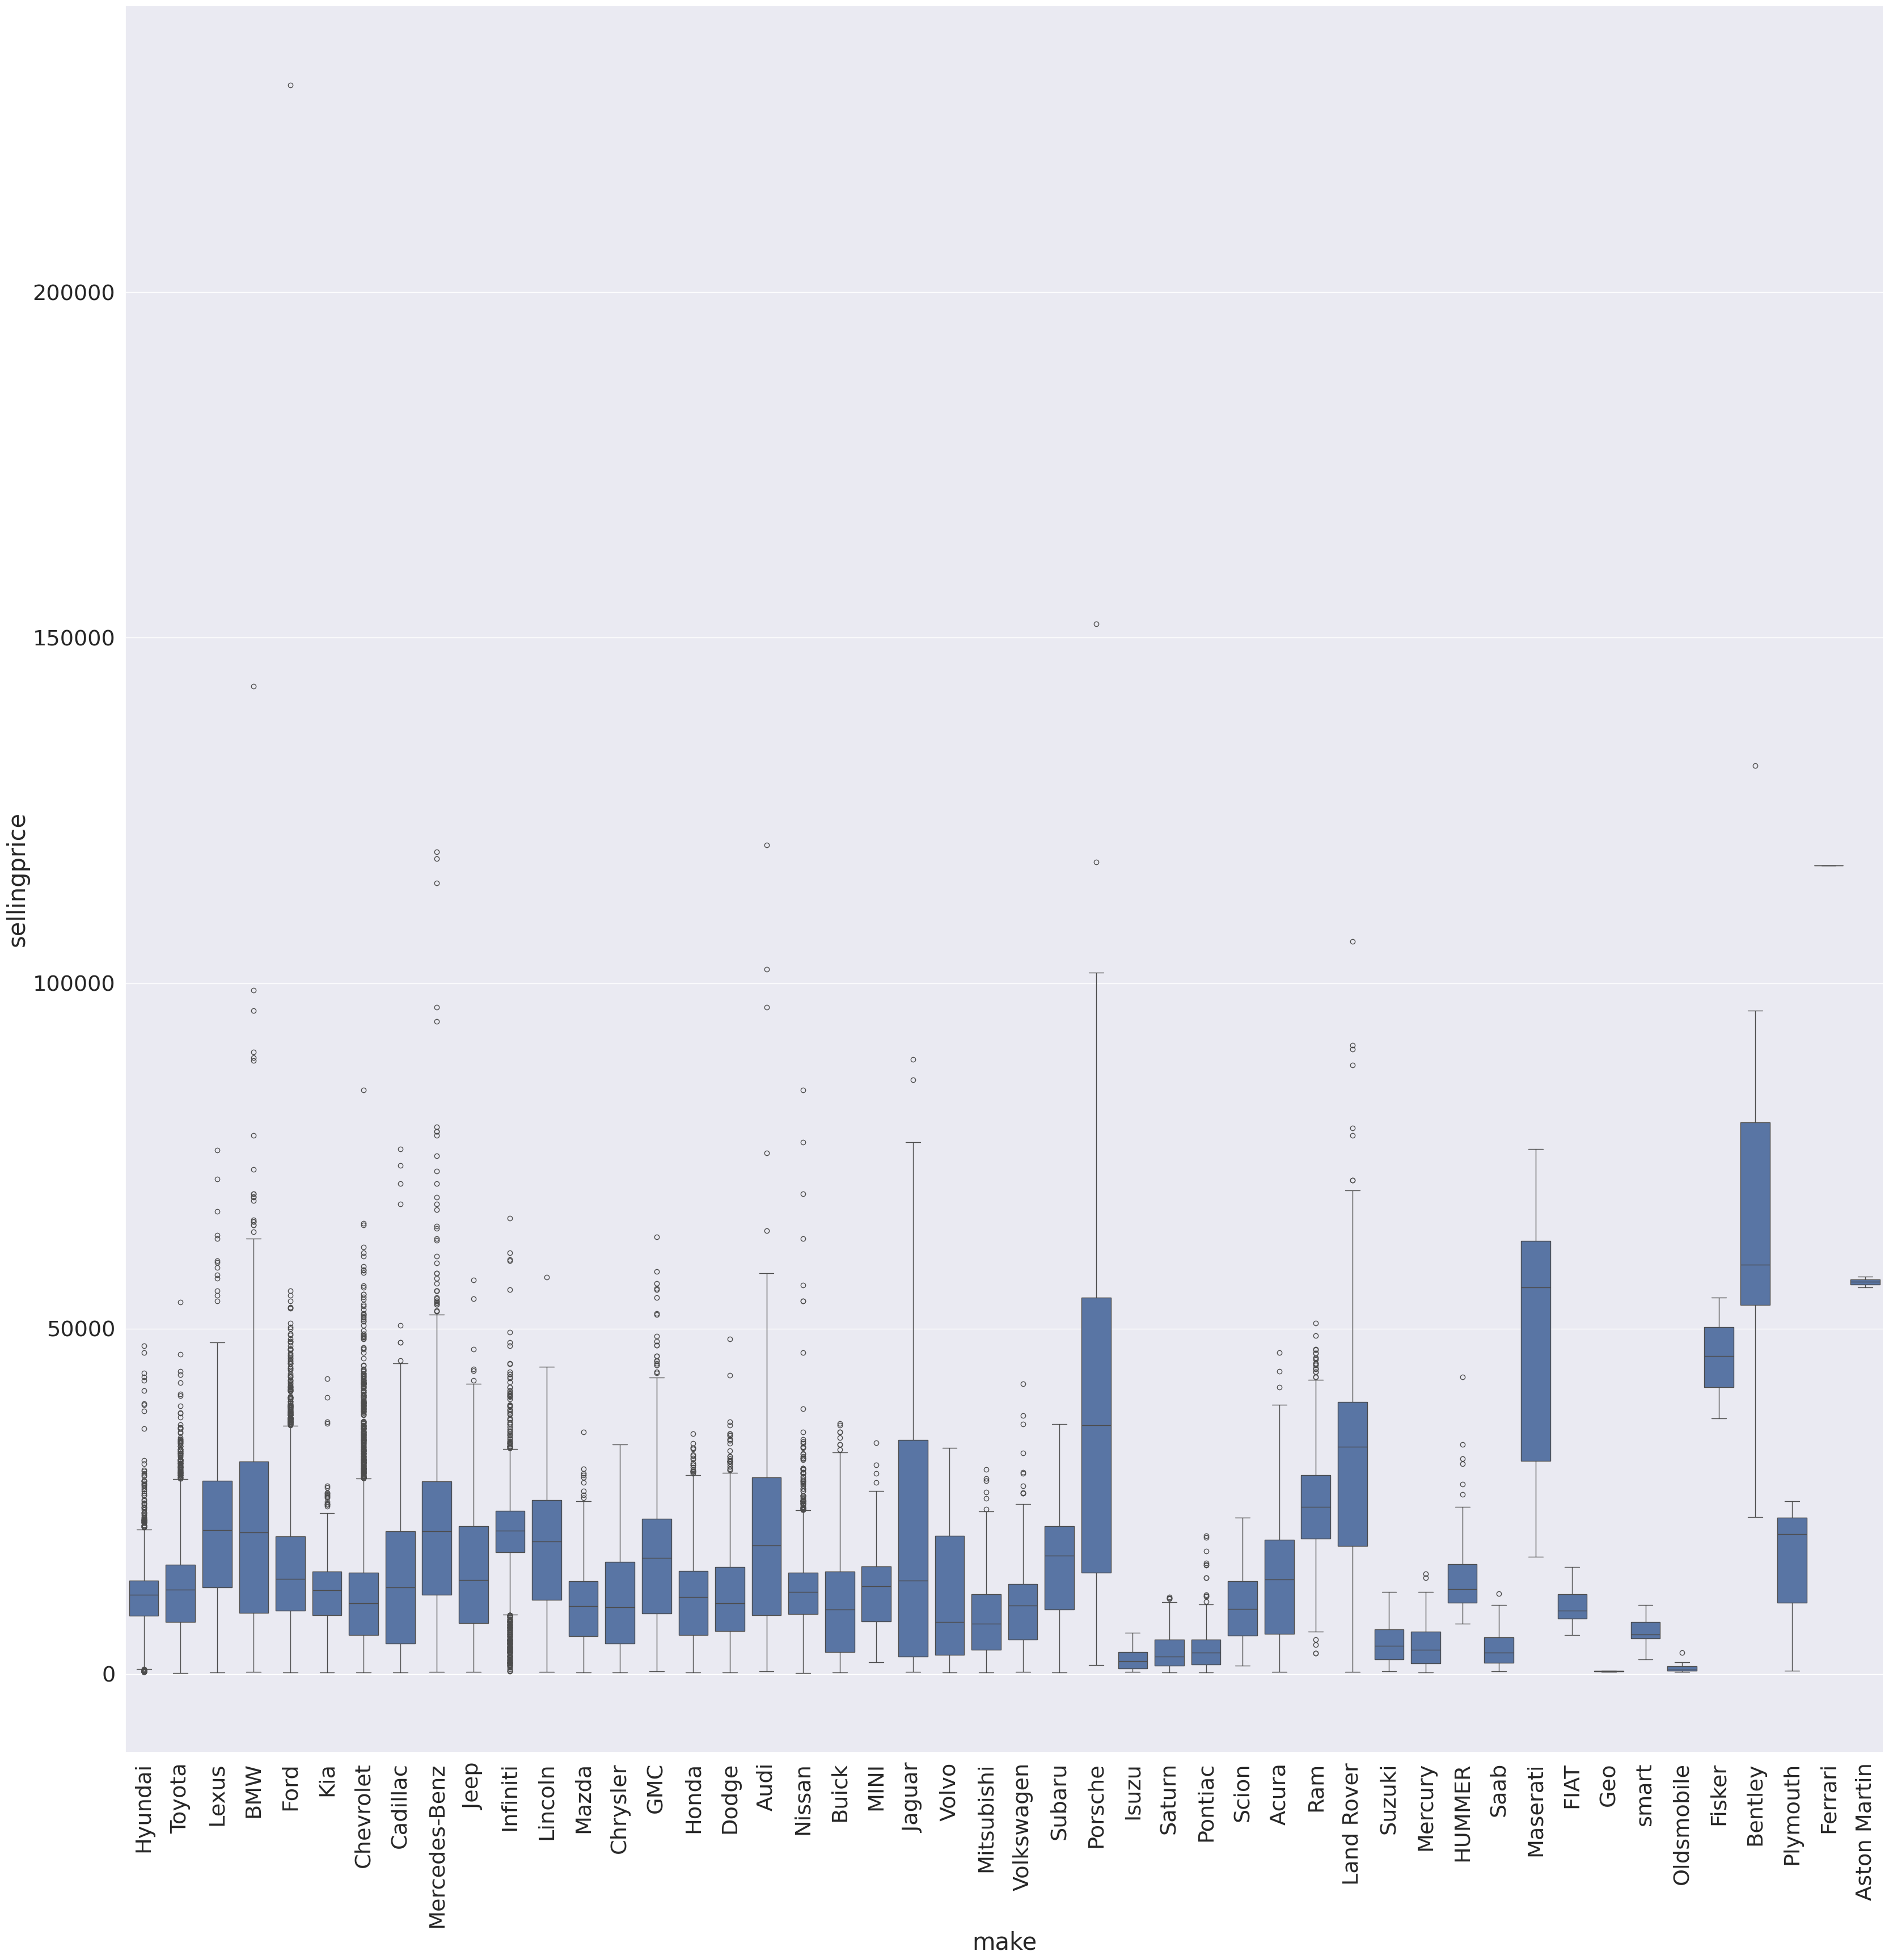

In [164]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,40))
Boxplot= sns.boxplot(x="make", y="sellingprice", data=df)
plt.xticks(rotation=90);

**It appears that Bently, Massarati and Aston Martin are some of the Higher end Brands with higher prices.**

**While Isuzu, Oldsmobile and Geo are some of the lowest price Brands.**

**We can also see that the boxplots of Porche and Maserati are the widest distributed boxes which means they cover a higher range of values.**

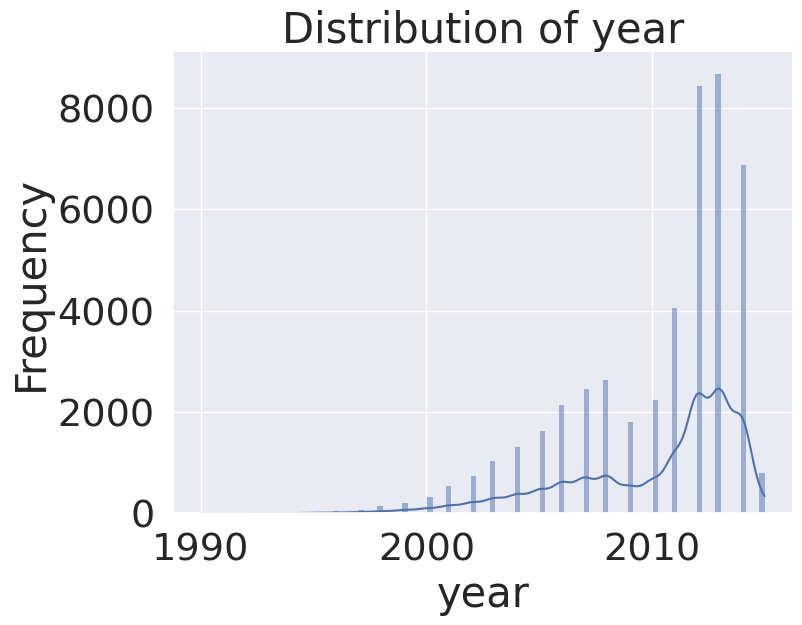

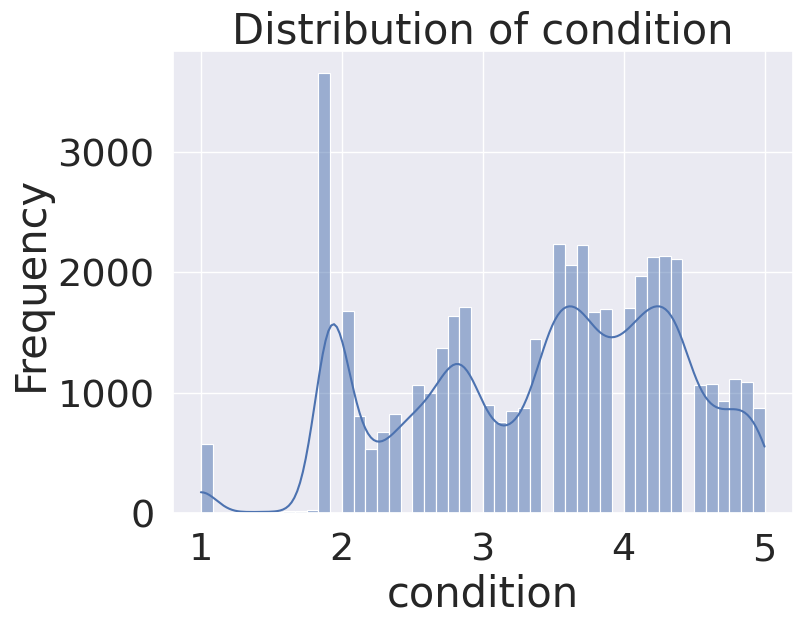

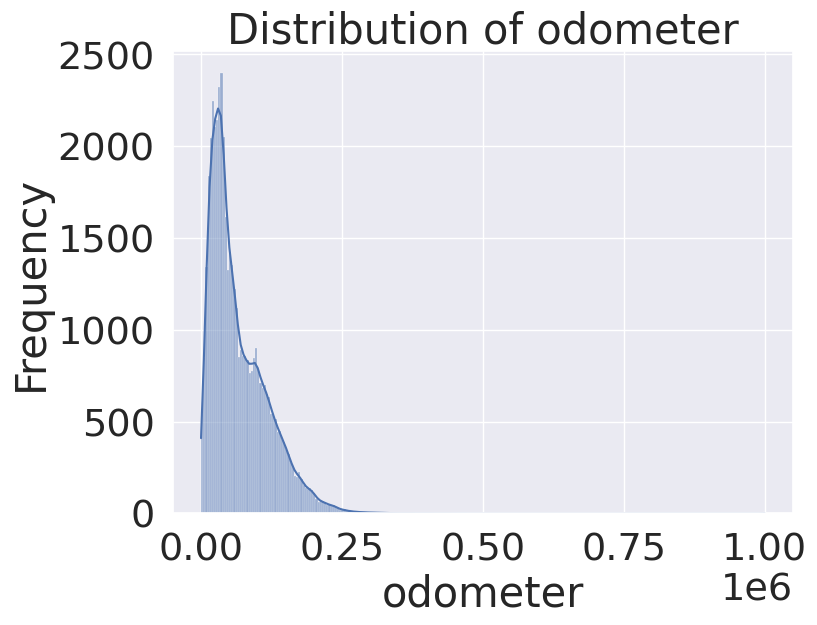

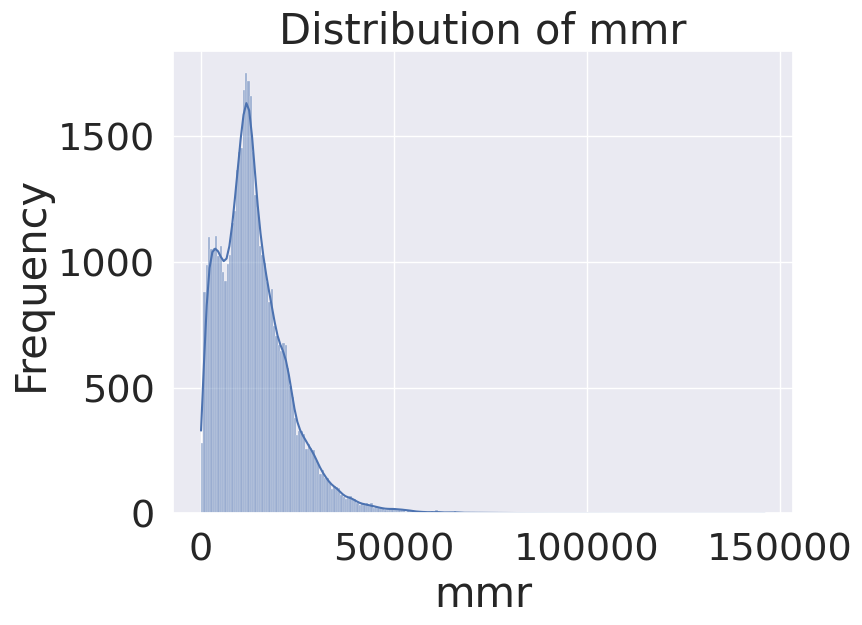

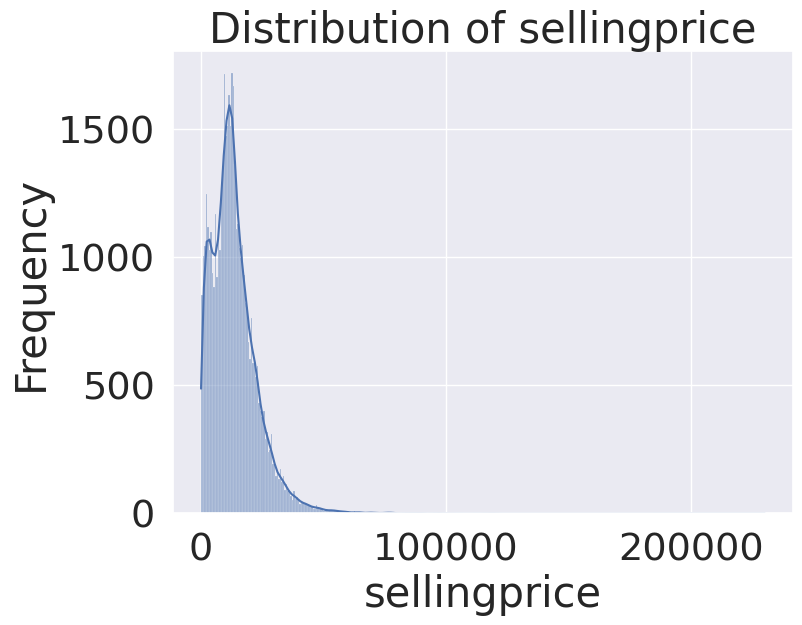

In [165]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

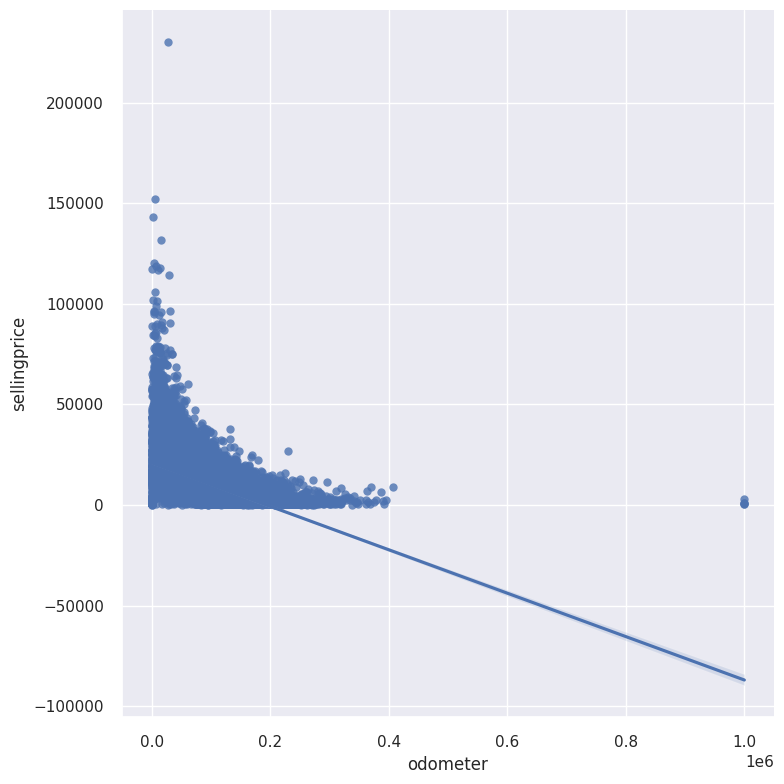

In [166]:
sns.set(font_scale=1)
sns.lmplot(x="odometer",y="sellingprice",data=df,height=8);

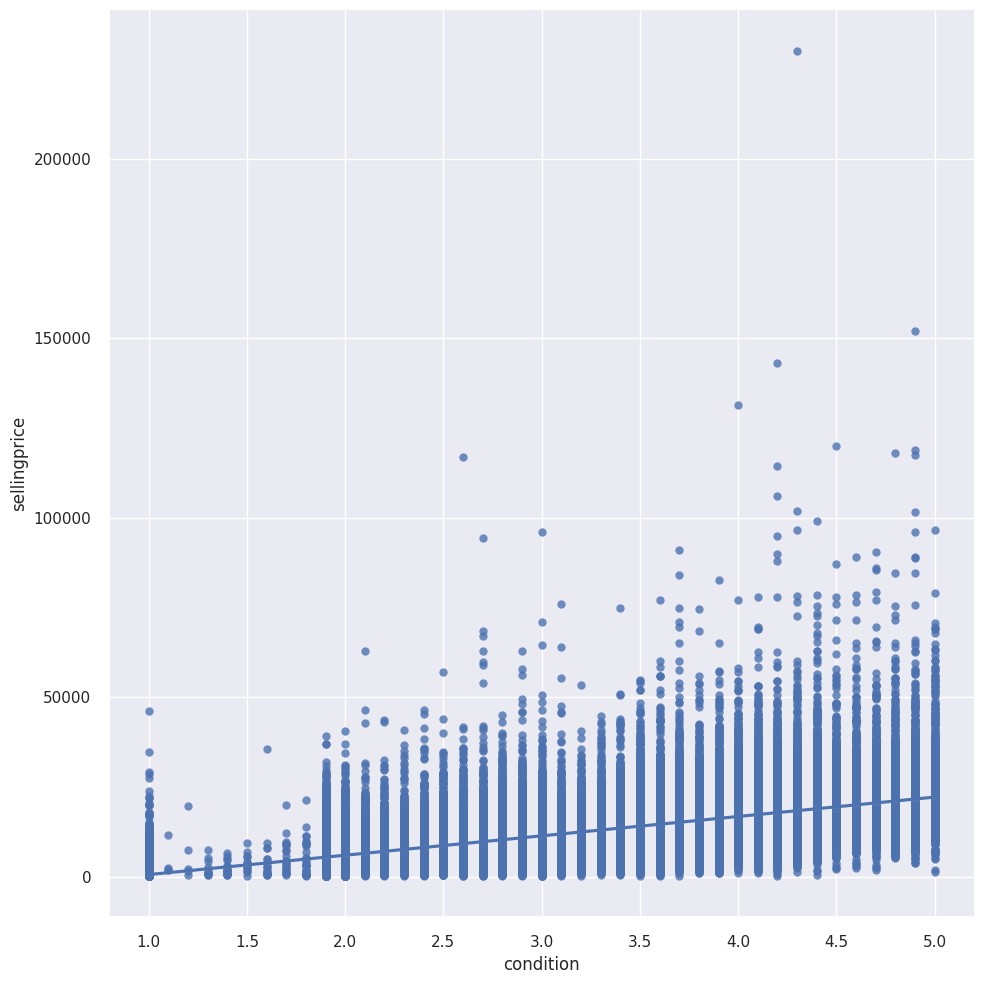

In [167]:
sns.lmplot(x="condition",y="sellingprice",data=df,height=10)

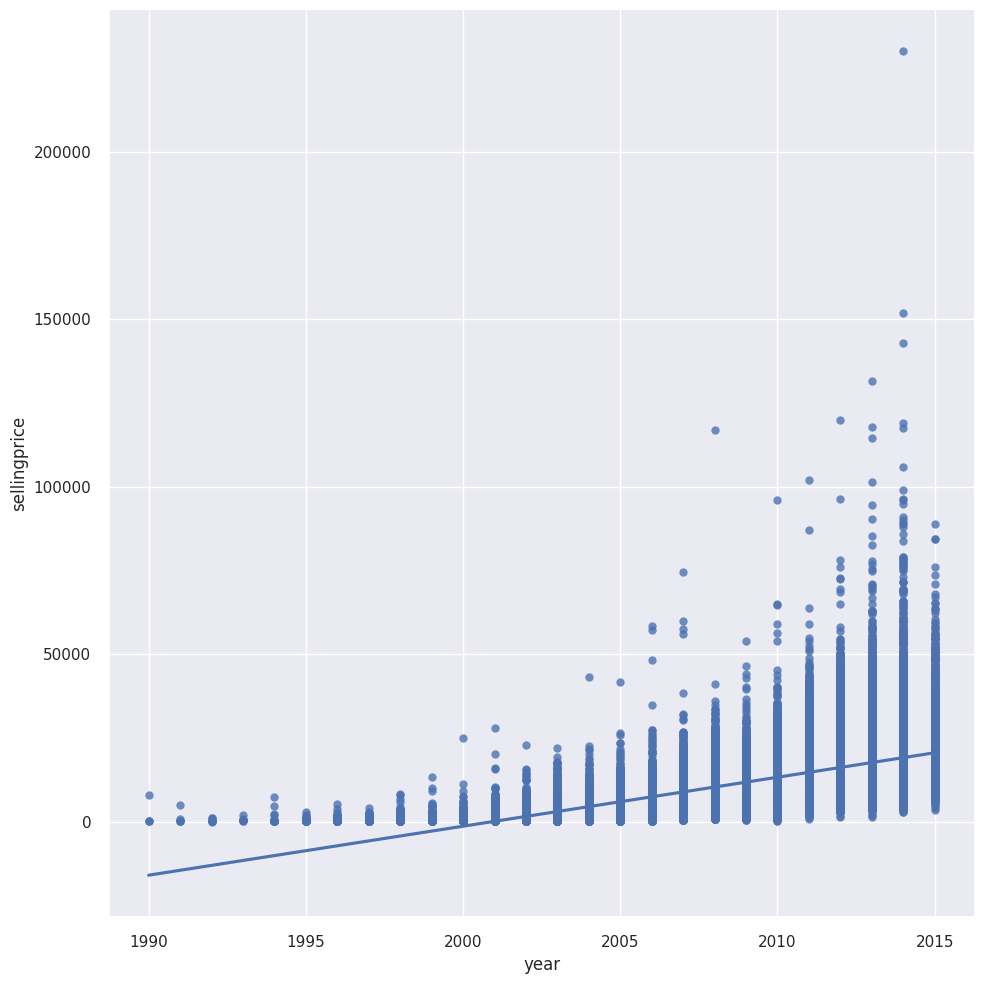

In [168]:
sns.lmplot(x="year",y="sellingprice",data=df,height=10)

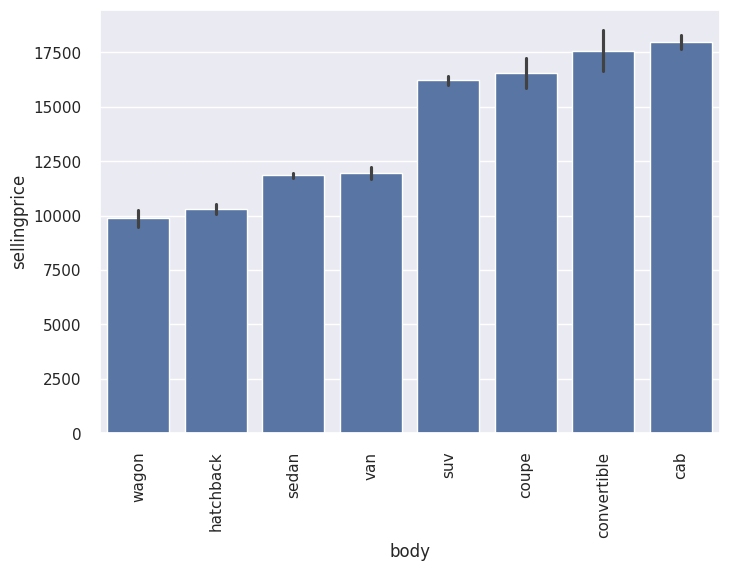

In [169]:
order= df[["body","sellingprice"]].groupby('body').mean().sort_values("sellingprice").index

ax= sns.barplot(x="body",y="sellingprice",data=df,order=order)
plt.xticks(rotation=90);

**From the graph we can see that Cabs and Convertible cars have higher prices.**

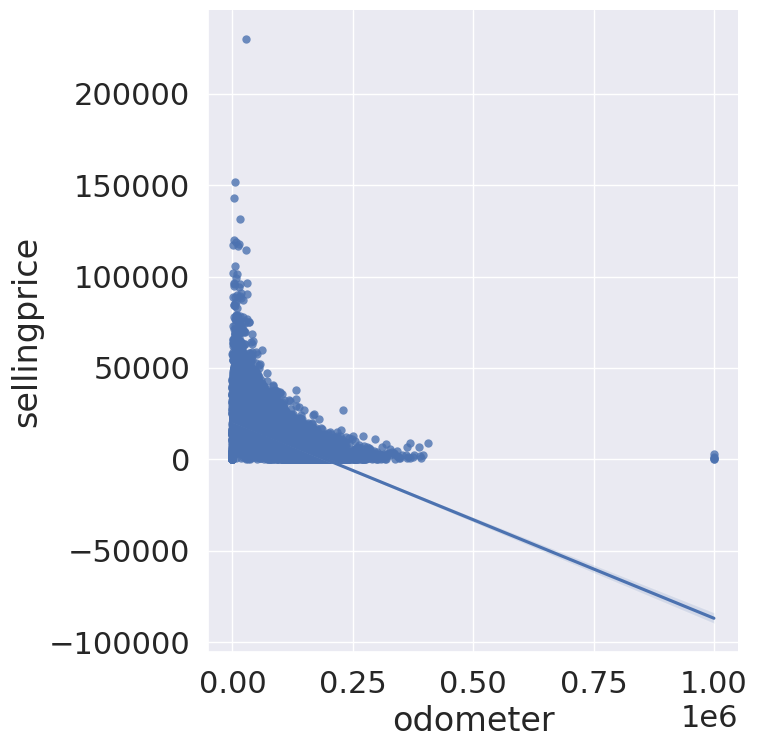

In [170]:
sns.set(font_scale=2)
sns.lmplot(x="odometer",y="sellingprice",data=df,height=8);

**There is a negative correlation between the odometer and the selling price, this means that the higher the odometer reading in a car the lower its price.**

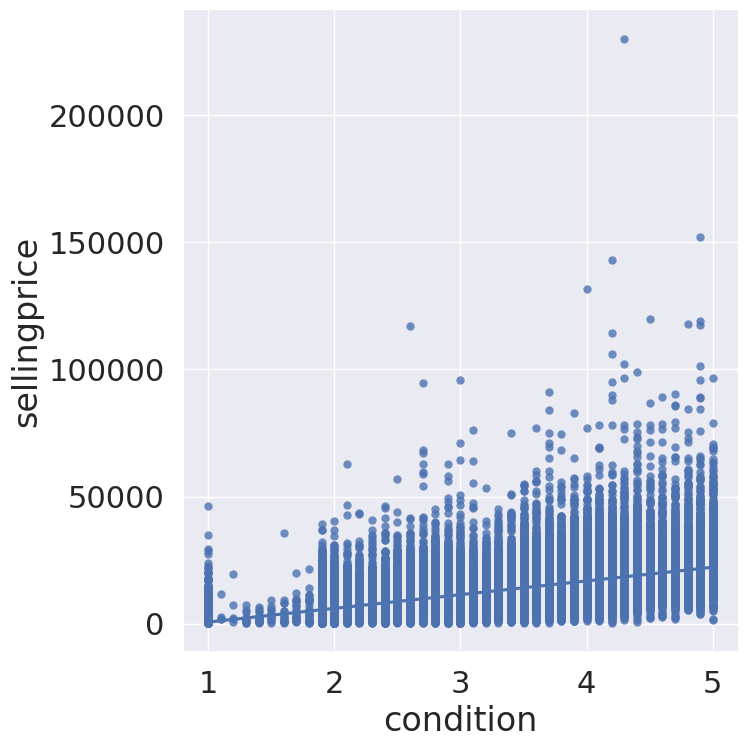

In [171]:
sns.lmplot(x="condition",y="sellingprice",data=df,height=8);

**While the correlation between the condition of the car and its price is positive, the higher the condition the higher the price.**

#### Visualizing the correlation of columns with the price.

<Axes: >

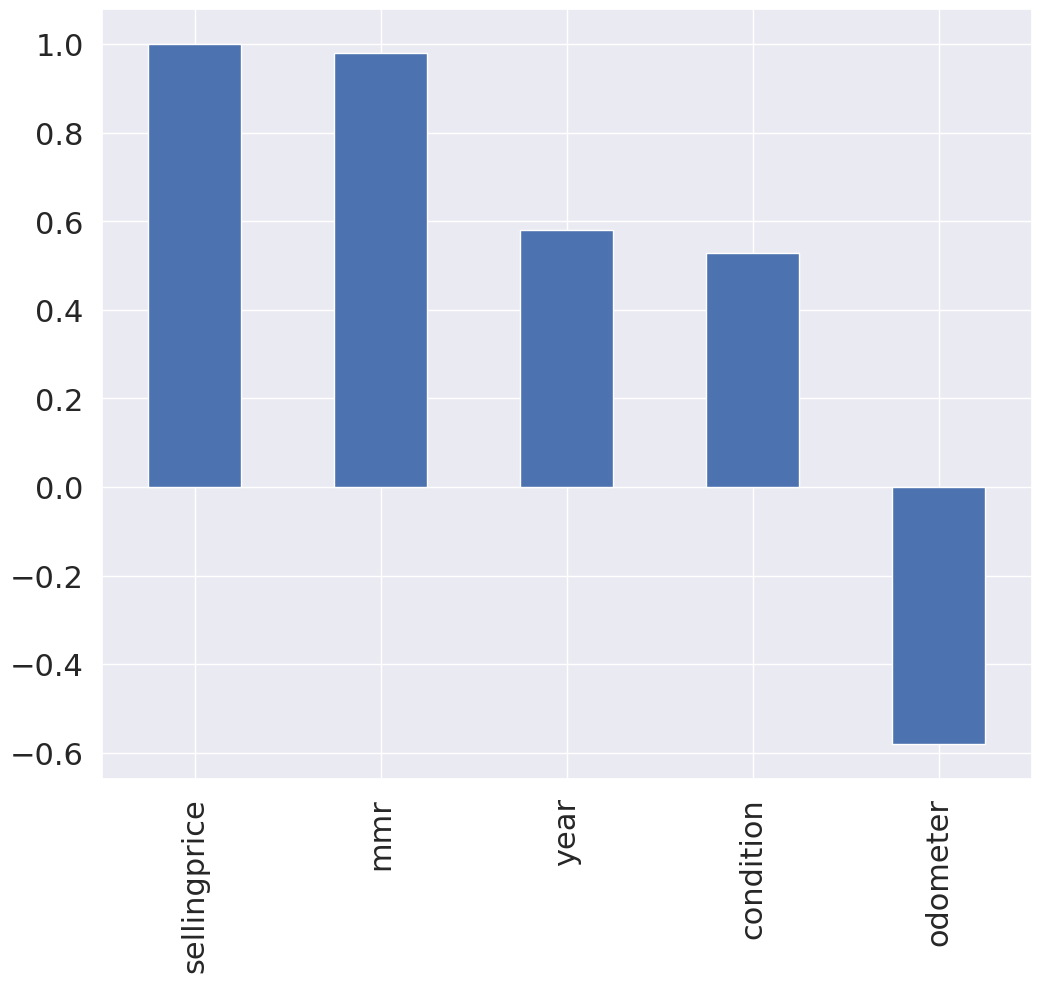

In [172]:
plt.figure(figsize=(12,10))
df.corr(numeric_only= True)['sellingprice'].sort_values(ascending = False).plot(kind='bar')

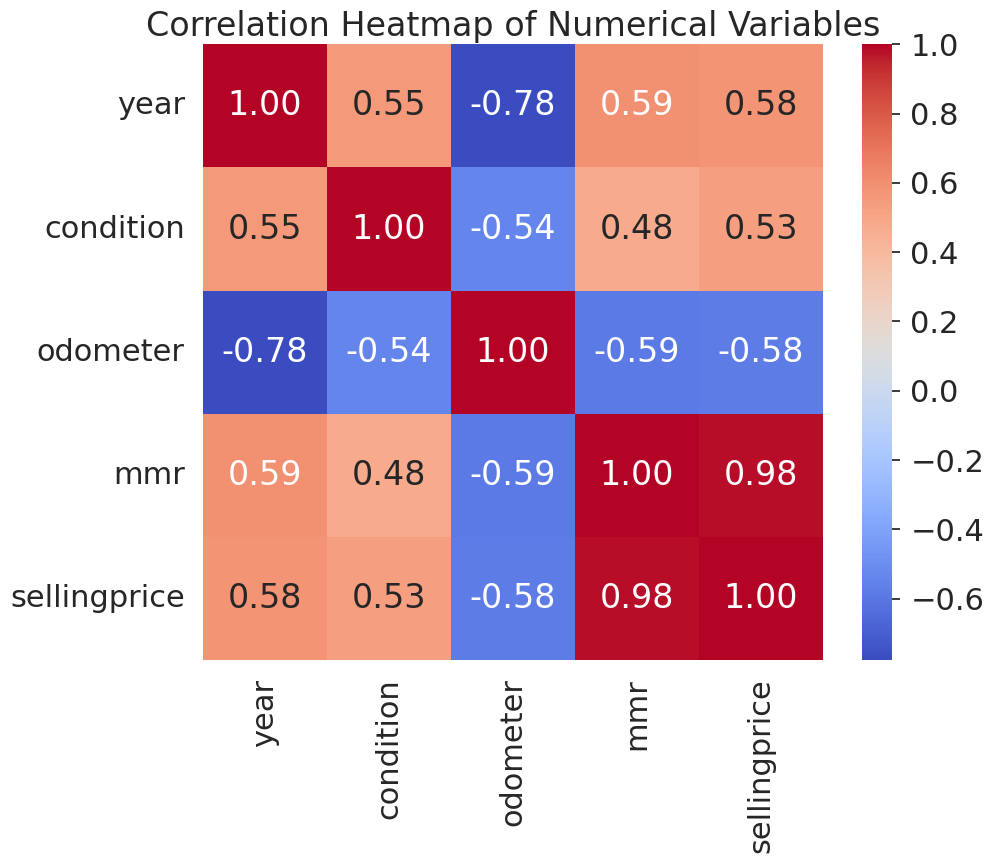

In [173]:
# prompt: heatmap for the numerical variable correlation

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Data Preprocessing


### Feature Engineering


**We created a new feature `car_age` by calculating the difference between the year of sale and the manufacturing year of the car. We also added a fractional component based on the sale month to increase precision:**

In [175]:
df['car_age'] = df['saledate'].dt.year - df['year'] + round(df['saledate'].dt.month / 12,2 )
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00,2.50
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,black,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00,1.17
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00,3.08
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00,13.25
4,2014,Ford,E-Series Van,E-250,van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00,1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,suv,automatic,2fmdk4gc2dbc03247,va,3.5,52844,black,gray,wheels exchange llc,15650,17000,2015-01-07 01:30:00+00:00,2.08
46574,2012,Infiniti,G Sedan,G37 Journey,sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,2015-06-17 22:30:00+00:00,3.50
46575,2013,BMW,3 Series,328i,sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,2015-02-17 18:00:00+00:00,2.17
46576,2013,Toyota,Camry,LE,sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,2015-01-13 20:30:00+00:00,2.08


### Feature Selection


**We will be using the variance inflation factor to check for multicolinearty**

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_df = df.select_dtypes(include=np.number)
x_numeric = numeric_df.drop('sellingprice', axis=1)

VIF_data = pd.DataFrame()
VIF_data['feature'] = x_numeric.columns
VIF_data['VIF'] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

VIF_data

,feature,VIF
0,year,36.291350
1,condition,21.984717
2,odometer,7.381929
3,mmr,5.281601
4,car_age,7.664165



We will drop the columns `vin`, `year`, `saledate`, and `mmr` for the following reasons:

- **`vin`**: This is a unique identifier for each car and doesn't provide predictive value for modeling—keeping it would risk overfitting.
- **`year`** and **`saledate`**: we already extracted meaningful features from these columns (e.g., car age), so they are no longer needed in their original form and year have high VIF value which indicated multicolinearity.
- **`mmr`**: This column represents an external market estimate of the car's price. Since the goal is to build our own price prediction model, including it would undermine the purpose of the project.

In [177]:
df = df.drop(['vin','year','saledate','mmr'],axis=1)
df.head()

,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice,car_age
0,Hyundai,Sonata,GLS,sedan,automatic,ma,3.9,50404,black,gray,the hertz corporation,10900,2.50
1,Toyota,4Runner,SR5,suv,automatic,fl,4.9,17846,gray,black,award auto sales and leasing inc,29900,1.17
2,Lexus,IS 250,Base,sedan,automatic,fl,4.1,21122,silver,black,lexus financial services,24200,3.08
3,BMW,X5,4.4i,suv,automatic,fl,1.9,145303,black,black,peddle llc,3200,13.25
4,Ford,E-Series Van,E-250,van,automatic,wa,4.9,6714,white,gray,u-haul,22100,1.17


In [178]:
# Checking VIF agian after dropping columns
numeric_df = df.select_dtypes(include=np.number)
x_numeric = numeric_df.drop('sellingprice', axis=1)

VIF_data = pd.DataFrame()
VIF_data['feature'] = x_numeric.columns
VIF_data['VIF'] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

VIF_data

,feature,VIF
0,condition,1.912671
1,odometer,6.497761
2,car_age,6.581874


**From the visualization above, We can see that there are some outliers in the odometer and selling price columns which should be dropped so it doesn't affect sensitive models such as linear regression**

In [179]:
df.drop(df.index[df["odometer"]>800000], inplace = True)
df.drop(df.index[df["sellingprice"]>100000], inplace = True)

**We will normalize the numerical columns to fit them in similar ranges so it doesn't affect the coefficient calculation in the linear regression model**

**We will use Z-score normalization since it is less sensitive to outliers**

In [180]:
cols_to_normalize = ['condition','odometer','car_age']
# Applying Z-score normalization
for col in cols_to_normalize:
    mean = df[col].mean()
    std_dev = df[col].std()
    df[col] = (df[col] - mean) / std_dev

print(df[cols_to_normalize].head())


   condition  odometer   car_age
0   0.504131 -0.321078 -0.659958
1   1.563672 -0.959969 -1.008261
2   0.716039 -0.895683 -0.508067
3  -1.614951  1.541141  2.155269
4   1.563672 -1.178414 -1.008261


**Encoding the categorical columns using one hot encoding since there is no ranking in their unique values.**

**This is mainly for the linear regression model, We will also run Catboost model which doesn't require encoding.**

In [181]:
df_encodedoh = pd.get_dummies(data=df, columns=df.select_dtypes(object).columns, dtype='int8',drop_first=True)
df_encodedoh

,condition,odometer,sellingprice,car_age,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,seller_zanger enterprises inc,seller_zappone chrysler jeep dodge inc,seller_zappone chrysler jeep dodge ram,seller_zeibak auto trading,seller_zeigler honda amherst,seller_zimbrick eastside,seller_zimbrick volkswagen of madison,seller_zimmerman auto brokers inc,seller_zinc auto finance,seller_zmax moto leasing inc
0,0.504131,-0.321078,10900,-0.659958,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.563672,-0.959969,29900,-1.008261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.716039,-0.895683,24200,-0.508067,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.614951,1.541141,3200,2.155269,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.563672,-1.178414,22100,-1.008261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,0.080314,-0.273197,17000,-0.769948,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46574,1.139856,-0.855200,21500,-0.398077,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46575,0.821993,-0.420116,22000,-0.746379,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46576,0.080314,-0.458989,13800,-0.769948,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Splitting the data into testing and training data (we will also use cross validation later on).**

In [182]:
from sklearn.model_selection import train_test_split

x = df_encodedoh.drop('sellingprice',axis=1) # Independent variable
y = df_encodedoh['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 32592
Testing dataset size: 13968


## Model Building & Evaluation

In [183]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred_sk = lin_reg.predict(x_test)


**Calculating the root mean square error and R square values to gain insights on the performance of the model.**

In [184]:
from sklearn.metrics import root_mean_squared_error
#Root Mean Squared Error
rmse = root_mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(x_test,y_test)
print('The Root Mean Square Error(MSE)  is: ', rmse)
print('R square is :', R_square_sk)

The Root Mean Square Error(MSE)  is:  3425.751520127799
R square is : 0.8698874907451335



The model achieved an R² score of **0.87**, which means it explains about 87% of the variance in car prices. This is a strong indicator that the linear regression model fits the data well.

The **RMSE is approximately 3,426**, which suggests that, on average, the predicted prices deviate from the actual prices by about 3.4K. Given that car prices in this dataset range from 150 to 100,000, this corresponds to an average error of roughly **3.4%**, which we consider relatively low and acceptable for practical purposes.

### Assumption Checks for Linear Regression

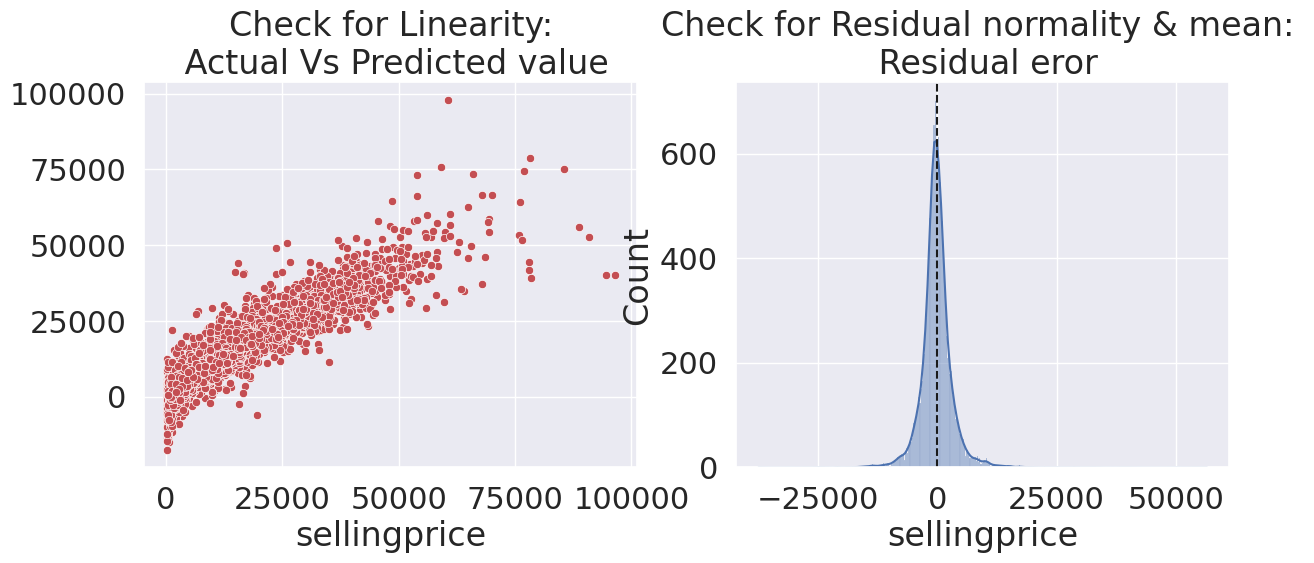

In [185]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_sk, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred_sk), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred_sk).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

**1. Linearity**
The scatter plot of **actual vs. predicted values** (left) shows a clear upward linear trend, indicating that the model captures the linear relationship between features and the target variable well. The spread widens slightly at higher price ranges, but no major non-linear pattern is observed—suggesting that the **linearity assumption is reasonably satisfied**.

**2. Residual Normality & Mean Zero**
The **residual error distribution** (right) appears approximately symmetric and bell-shaped, centered around zero. This suggests that:
- The residuals are **roughly normally distributed**
- The **mean of residuals is close to zero**

Both of these support the assumptions required for linear regression, indicating that the model is statistically valid and not biased in its predictions.



We will experiment with more advanced models like **Catboost** or **XGBoost** for potential gains in predictive power.

### Advanced Model Performance Evaluation: XGBoost vs. CatBoost

In [186]:
from xgboost import XGBRegressor

# Initialize models
xgb_reg = XGBRegressor(random_state=23)

# Train XGBoost Regressor
xgb_reg.fit(x_train, y_train)
y_pred_xgb = xgb_reg.predict(x_test)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
r2_xgb = xgb_reg.score(x_test, y_test)

print(f'XGBoost Regressor:')
print(f'  RMSE: {rmse_xgb}')
print(f'  R-squared: {r2_xgb}')

XGBoost Regressor:
  RMSE: 3042.771240234375
  R-squared: 0.8973530530929565



####  XGBoost Regressor
- **R² Score:** 0.897  
- **RMSE:** 3,042.77

XGBoost shows a solid improvement over linear regression, increasing the R² from 0.87 to **~0.90** and reducing RMSE from 3,426 to **~3,043**. This confirms its ability to capture non-linear relationships and complex interactions between features.


In [187]:
#!pip install catboost
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score


x = df.drop('sellingprice',axis=1) # Independent variable
y = df['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)

# Train CatBoost Regressor

cat_features = df.select_dtypes(include='object').columns.tolist()
cat_reg = CatBoostRegressor(random_state=23, verbose=0)
cat_reg.fit(x_train, y_train,cat_features=cat_features)

y_pred_cat = cat_reg.predict(x_test)
rmse_cat = root_mean_squared_error(y_test, y_pred_cat)
r2_cat = cat_reg.score(x_test, y_test)

print(f'CatBoost Regressor:')
print(f'  RMSE: {rmse_cat}')
print(f'  R-squared: {r2_cat}')

CatBoost Regressor:
  RMSE: 2795.8294388049603
  R-squared: 0.9133380052540125





####  CatBoost Regressor
- **R² Score:** 0.91  
- **RMSE:** 2,796


CatBoost outperforms both Linear Regression and XGBoost, achieving the **lowest RMSE** and **highest R²**.





###  Summary

- **CatBoost is the best-performing model** so far, providing strong predictive power with minimal tuning and excellent generalization.
- Its native handling of categorical features and ability to model non-linear patterns make it well-suited for this type of structured, real-world dataset.
- Given its low error and high stability, **CatBoost should be considered the primary model for deployment or further tuning**.
